In [1]:
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import mlflow

MLFLOW_URI = 'http://127.0.0.1:7500'
        
# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri = MLFLOW_URI)
logged_model = 'runs:/4af57f379fb148da9a95085ec4621d9b/credit_default_model-2'

# Load model as a PyFuncModel.
loaded_model = mlflow.lightgbm.load_model(logged_model)



C:\Users\flore\projectA\streamlitenv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
train_df = pd.read_csv('C:\\Users\\flore\\Desktop\\opensclass\\Projet 7\\train_df_less_features.csv')

In [5]:
train_df.head()

SK_ID_CURR  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  PAYMENT_RATE  \
0      100002      0.083037      0.262949      0.139376      0.060749   
1      100003      0.311267      0.622246           NaN      0.027598   
2      100004           NaN      0.555912      0.729567      0.050000   
3      100006           NaN      0.650442           NaN      0.094941   
4      100007           NaN      0.322738           NaN      0.042623   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_EMPLOYED_PERC  DAYS_REGISTRATION  \
0       -9461         -637.0            0.067329            -3648.0   
1      -16765        -1188.0            0.070862            -1186.0   
2      -19046         -225.0            0.011814            -4260.0   
3      -19005        -3039.0            0.159905            -9833.0   
4      -19932        -3038.0            0.152418            -4311.0   

   DAYS_ID_PUBLISH  AMT_ANNUITY  ANNUITY_INCOME_PERC  INSTAL_DBD_MEAN  \
0            -2120      24700.5             0.121978        20.421053   
1             -291      35698.5             0.132217         7.160000   
2            -2531       6750.0             0.100000         7.666667   
3            -2437      29686.5             0.219900        19.375000   
4            -3458      21865.5             0.179963         4.590909   

   REGION_POPULATION_RELATIVE  TARGET  prediction  
0                    0.018801     1.0    0.236506  
1                    0.003541     0.0    0.072170  
2                    0.010032     0.0    0.038389  
3                    0.008019     0.0    0.056073  
4                    0.028663     0.0    0.050111

In [6]:
# Define a custom function to apply to each row
def update_column_Answer0005(row):
    if row['prediction'] <= 0.005:
        return 0
    else:
        return 1

# Apply the custom function to update column 'B'
train_df['Answer_0.005'] = train_df.apply(update_column_Answer0005, axis=1)

# Define a custom function to apply to each row
def update_column_Answer00075(row):
    if row['prediction'] <= 0.0075:
        return 0
    else:
        return 1
# Apply the custom function to update column 'B'
train_df['Answer_0.0075'] = train_df.apply(update_column_Answer00075, axis=1)

# Define a custom function to apply to each row
def update_column_Answer001(row):
    if row['prediction'] <= 0.01:
        return 0
    else:
        return 1

# Apply the custom function to update column 'B'
train_df['Answer_0.01'] = train_df.apply(update_column_Answer001, axis=1)

# Define a custom function to apply to each row
def update_column_Answer002(row):
    if row['prediction'] <= 0.02:
        return 0
    else:
        return 1
# Apply the custom function to update column 'B'
train_df['Answer_0.02'] = train_df.apply(update_column_Answer002, axis=1)

# Define a custom function to apply to each row
def update_column_Answer003(row):
    if row['prediction'] <= 0.03:
        return 0
    else:
        return 1

# Apply the custom function to update column 'B'
train_df['Answer_0.03'] = train_df.apply(update_column_Answer003, axis=1)

# Define a custom function to apply to each row
def update_column_Answer004(row):
    if row['prediction'] <= 0.04:
        return 0
    else:
        return 1
# Apply the custom function to update column 'B'
train_df['Answer_0.04'] = train_df.apply(update_column_Answer004, axis=1)


# Define a custom function to apply to each row
def update_column_Answer005(row):
    if row['prediction'] <= 0.05:
        return 0
    else:
        return 1
# Apply the custom function to update column 'B'
train_df['Answer_0.05'] = train_df.apply(update_column_Answer005, axis=1)

# Define a custom function to apply to each row
def update_column_Answer0075(row):
    if row['prediction'] <= 0.075:
        return 0
    else:
        return 1

# Apply the custom function to update column 'B'
train_df['Answer_0.075'] = train_df.apply(update_column_Answer0075, axis=1)


# Define a custom function to apply to each row
def update_column_Answer01(row):
    if row['prediction'] <= 0.1:
        return 0
    else:
        return 1
# Apply the custom function to update column 'B'
train_df['Answer_0.1'] = train_df.apply(update_column_Answer01, axis=1)

# Define a custom function to apply to each row
def update_column_Answer0125(row):
    if row['prediction'] <= 0.125:
        return 0
    else:
        return 1
# Apply the custom function to update column 'B'
train_df['Answer_0.125'] = train_df.apply(update_column_Answer0125, axis=1)

# Define a custom function to apply to each row
def update_column_Answer015(row):
    if row['prediction'] <= 0.15:
        return 0
    else:
        return 1

# Apply the custom function to update column 'B'
train_df['Answer_0.15'] = train_df.apply(update_column_Answer015, axis=1)

# Define a custom function to apply to each row
def update_column_Answer02(row):
    if row['prediction'] <= 0.2:
        return 0
    else:
        return 1
# Apply the custom function to update column 'B'
train_df['Answer_0.2'] = train_df.apply(update_column_Answer02, axis=1)

# Define a custom function to apply to each row
def update_column_Answer03(row):
    if row['prediction'] <= 0.3:
        return 0
    else:
        return 1
# Apply the custom function to update column 'B'
train_df['Answer_0.3'] = train_df.apply(update_column_Answer03, axis=1)

# Define a custom function to apply to each row
def update_column_Answer04(row):
    if row['prediction'] <= 0.4:
        return 0
    else:
        return 1
# Apply the custom function to update column 'B'
train_df['Answer_0.4'] = train_df.apply(update_column_Answer04, axis=1)

# Define a custom function to apply to each row
def update_column_Answer05(row):
    if row['prediction'] <= 0.5:
        return 0
    else:
        return 1
# Apply the custom function to update column 'B'
train_df['Answer_0.5'] = train_df.apply(update_column_Answer05, axis=1)

# Define a custom function to apply to each row
def update_column_Answer06(row):
    if row['prediction'] <= 0.6:
        return 0
    else:
        return 1
# Apply the custom function to update column 'B'
train_df['Answer_0.6'] = train_df.apply(update_column_Answer06, axis=1)

# Define a custom function to apply to each row
def update_column_Answer07(row):
    if row['prediction'] <= 0.7:
        return 0
    else:
        return 1

# Apply the custom function to update column 'B'
train_df['Answer_0.7'] = train_df.apply(update_column_Answer07, axis=1)

In [7]:
train_df.head()

SK_ID_CURR  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  PAYMENT_RATE  \
0      100002      0.083037      0.262949      0.139376      0.060749   
1      100003      0.311267      0.622246           NaN      0.027598   
2      100004           NaN      0.555912      0.729567      0.050000   
3      100006           NaN      0.650442           NaN      0.094941   
4      100007           NaN      0.322738           NaN      0.042623   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_EMPLOYED_PERC  DAYS_REGISTRATION  \
0       -9461         -637.0            0.067329            -3648.0   
1      -16765        -1188.0            0.070862            -1186.0   
2      -19046         -225.0            0.011814            -4260.0   
3      -19005        -3039.0            0.159905            -9833.0   
4      -19932        -3038.0            0.152418            -4311.0   

   DAYS_ID_PUBLISH  ...  Answer_0.075  Answer_0.1  Answer_0.125  Answer_0.15  \
0            -2120  ...             1           1             1            1   
1             -291  ...             0           0             0            0   
2            -2531  ...             0           0             0            0   
3            -2437  ...             0           0             0            0   
4            -3458  ...             0           0             0            0   

   Answer_0.2  Answer_0.3  Answer_0.4  Answer_0.5  Answer_0.6  Answer_0.7  
0           1           0           0           0           0           0  
1           0           0           0           0           0           0  
2           0           0           0           0           0           0  
3           0           0           0           0           0           0  
4           0           0           0           0           0           0  

[5 rows x 33 columns]

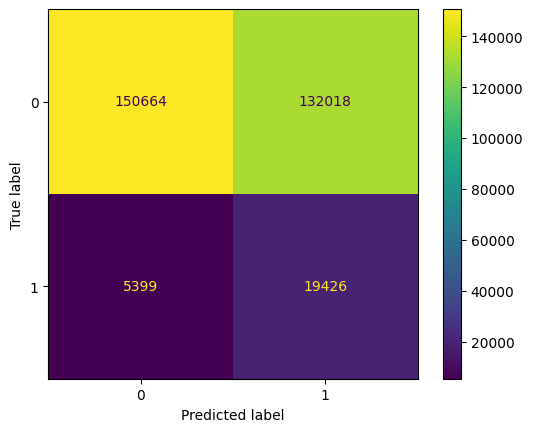

In [8]:
from sklearn import metrics
    
confusion_matrix = metrics.confusion_matrix(train_df['TARGET'], train_df['Answer_0.04'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

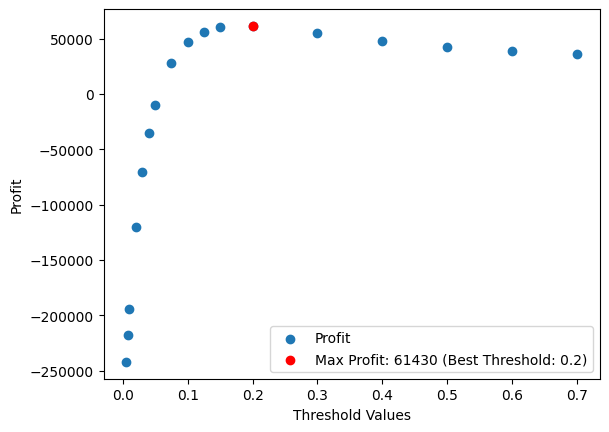

In [11]:
liste1 = [0.005, 0.0075, 0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.125, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
profit = []

for i in liste1:
    confusion_matrix = metrics.confusion_matrix(train_df['TARGET'], train_df['Answer_' + str(i)])
    profit.append(confusion_matrix[0][0] - confusion_matrix[0][1] - (10 * (confusion_matrix[1][0])))
    
# Find the index of the minimum profit value
max_profit_index = profit.index(max(profit))

# Create a scatter plot
plt.scatter(liste1, profit, label='Profit')

# Highlight the minimum profit point in red
plt.scatter(liste1[max_profit_index], profit[max_profit_index], c='red', label=f'Max Profit: {profit[max_profit_index]}', marker='o')

# Add labels and legend
plt.xlabel('Threshold Values')
plt.ylabel('Profit')
plt.legend(loc='upper right')  # Set legend position to upper right

# Add the best threshold to the legend
plt.legend(['Profit', f'Max Profit: {profit[max_profit_index]} (Best Threshold: {liste1[max_profit_index]})'])

# Show the plot
plt.show()